<a href="https://colab.research.google.com/github/KIMDOKYOUNG/DeepLearning/blob/master/2_chapter2/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 밑바닥부터 시작하는 딥러닝 2 뽀개기
#### CHAPTER 2 자연어와 단어의 분산 표현
#### 일자 : 2020-08-25


- 시소러스?
  - 유의어 사전
  - 뜻이 같은 단어(동의어)와 뜻이 비슷한 단어(유의어)가 한 그룹으로 분류되어 있다.
  - 가장 유명한 시소러스 : WordNet
  - 문제점 
    - 신조어가 계속 생긴다
    - 사람을 쓴느 비용이 크다
    - 단어의 미묘한 차이를 표현할 수 없다.

- 시소러스가 가지고 있는 문제를 해결하기 위해선! 
  - 통계 기반 기법
  - 신경망을 사용한 추론 기반 기법



## 통계 기반 기법 
### corpus(말뭉치) 전처리하기


In [1]:
import numpy as np

In [2]:
text = '안녕하세요 한림대학교에 재학중인 김도경입니다. 열심히 공부하고 있어요.'
text.lower()# 영어일 경우 
text = text.replace('.',' .')
text

'안녕하세요 한림대학교에 재학중인 김도경입니다 . 열심히 공부하고 있어요 .'

In [3]:
words = text.split(' ')
words

['안녕하세요', '한림대학교에', '재학중인', '김도경입니다', '.', '열심히', '공부하고', '있어요', '.']

In [4]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [5]:
word_to_id

{'.': 4,
 '공부하고': 6,
 '김도경입니다': 3,
 '안녕하세요': 0,
 '열심히': 5,
 '있어요': 7,
 '재학중인': 2,
 '한림대학교에': 1}

In [6]:
id_to_word

{0: '안녕하세요',
 1: '한림대학교에',
 2: '재학중인',
 3: '김도경입니다',
 4: '.',
 5: '열심히',
 6: '공부하고',
 7: '있어요'}

In [7]:
[w for w in words]

['안녕하세요', '한림대학교에', '재학중인', '김도경입니다', '.', '열심히', '공부하고', '있어요', '.']

In [8]:
corpus = [word_to_id[w] for w in words]

In [9]:
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 5, 6, 7, 4])

In [40]:
def preprocess(text):
  text = text.lower()# 영어일 경우
  text = text.replace('.',' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      id_idx = len(word_to_id)
      word_to_id[word] = id_idx
      id_to_word[id_idx] = word
  
  corpus = [word_to_id[w] for w in words]
  corpus = np.array(corpus)

  return corpus, word_to_id, id_to_word


In [11]:
text = '안녕하세요 한림대학교에 재학중인 김도경입니다. 열심히 공부하고 있어요.'
corpus, word_to_id, id_to_word = preprocess(text)

In [12]:
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 5 6 7 4]
{'안녕하세요': 0, '한림대학교에': 1, '재학중인': 2, '김도경입니다': 3, '.': 4, '열심히': 5, '공부하고': 6, '있어요': 7}
{0: '안녕하세요', 1: '한림대학교에', 2: '재학중인', 3: '김도경입니다', 4: '.', 5: '열심히', 6: '공부하고', 7: '있어요'}


###  분포가설
- 분포가설이란 단어의 의미는 주변 단어에 의해 형성된다는 것이다.

### 동시발생 행렬 만들어 보기
- 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지 집계하는 것 
- 윈도우 사이즈를 정할 수 있다. (앞 뒤로 몇 단어씩 볼 것 인지!)

In [13]:
# 기본 text
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'You', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'I', 5: 'hello', 6: '.'}


In [14]:
# corpus를 출력해보면 이렇게 구성되어 있다.
for idx, word_id in enumerate(corpus):
  print(idx, word_id)

0 0
1 1
2 2
3 3
4 4
5 1
6 5
7 6


In [15]:
print(word_to_id)

{'You': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'I': 4, 'hello': 5, '.': 6}


### corpus가 주어졌을때 동시발생 행렬을 직접 만들 수 있다

In [28]:
corpus_size = len(corpus)
vocab_size = len(word_to_id)
co_matrix = np.zeros((vocab_size, vocab_size), dtype= np.int32) # vocab_size로 빈 메트릭스를 만든다. 


In [29]:
co_matrix

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [30]:
window_size = 1 # 윈도우 사이즈를 지정해 줄 수 있다. 

In [31]:
for idx, word in enumerate(corpus):
  for i in range(1, window_size +1):
    left_idx = idx - i # 현재 단어의 왼쪽 단어 인덱스 
    right_idx = idx + i # 현재 단어의 오른쪽 단어 인덱스 

    if left_idx >= 0: # 왼쪽 단어 인덱스를 확인할 때 0보다 작으면 확인하지 않는다. 
      left_word_id = corpus[left_idx]
      co_matrix[word,left_word_id] += 1
    if right_idx < corpus_size : # 코퍼스 길이를 넘어가는 것도 확인하지 않는다. 
      right_word_id = corpus[right_idx]
      co_matrix[word,right_word_id] += 1


In [32]:
co_matrix # 윈도우 사이즈를 1로 준 동시발생 행렬이다. 

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [33]:
def make_co_matrix(corpus,window_size = 1):
  corpus_size = len(corpus)
  vocab_size = len(word_to_id)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype= np.int32) # vocab_size로 빈 메트릭스를 만든다. 
  for idx, word in enumerate(corpus):
    for i in range(1, window_size +1):
      left_idx = idx - i # 현재 단어의 왼쪽 단어 인덱스 
      right_idx = idx + i # 현재 단어의 오른쪽 단어 인덱스 

      if left_idx >= 0: # 왼쪽 단어 인덱스를 확인할 때 0보다 작으면 확인하지 않는다. 
        left_word_id = corpus[left_idx]
        co_matrix[word,left_word_id] += 1
      if right_idx < corpus_size : # 코퍼스 길이를 넘어가는 것도 확인하지 않는다. 
        right_word_id = corpus[right_idx]
        co_matrix[word,right_word_id] += 1
  
  return co_matrix


In [34]:
make_co_matrix(corpus)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

### 벡터 간 유사도 
- 코사인 유사도
  - 두 벡터가 가르키는 방향이 얼마나 비슷한가 
  - 일치하면 1, 정반대면 -1 
  - 분자 : 벡터의 내적 
  - 분모 : 각 벡터의 노름
    - 노름 : 벡터의 크기
    - 벡터의 각 원소를 제곱하여 더한 후 제곱근을 한 것 (L2 노름이다)

In [35]:
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2))
  ny = y / np.sqrt(np.sum(y**2))

  return np.dot(nx,ny)

In [37]:
# 위 코드는 제로 벡터가 들어왔을때 0으로 나눠지는 오류가 있어 방지하기 위해서 아주 작은 수를 분모에 더해준다. 
def cos_similarity(x,y, eps = 1e-8):
  nx = x/ (np.sqrt(np.sum(x**2)) +eps)
  ny = y / (np.sqrt(np.sum(y**2))+ eps)

  return np.dot(nx,ny)

In [41]:
text = 'You say goodbye and I say hello.'
corpus , word_to_id, id_to_word = preprocess(text)
print(word_to_id)
co_matrix = make_co_matrix(corpus)

c0 = co_matrix[word_to_id['you']]
c1 = co_matrix[word_to_id['i']]

print(cos_similarity(c0,c1))

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
0.7071067691154799


you와 i가 비교적 유사도가 높다는 것을 알 수 있다. (1에 근접할 수록 유사도가 높은 것 )

In [53]:
# 유사 단어의 랭킹 표시 

def most_similar(target, word_to_id, id_to_word, word_matrix, top = 5):
  if target not in word_to_id:
    print("%s를 찾을 수 없습니다.", target)
    return
  
  print('[target]'+target)
  target_id = word_to_id[target]
  target_vec = word_matrix[target_id]

  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)

  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], target_vec)

  for i in (-1 * similarity).argsort()[1:top+1]:
    print('%s : %s' % (id_to_word[i],similarity[i]))


In [54]:
most_similar('you',word_to_id, id_to_word,co_matrix)

[target]you
goodbye : 0.7071067691154799
i : 0.7071067691154799
hello : 0.7071067691154799
say : 0.0
and : 0.0


you와 i가 가깝지만, goodbye와 hello가 유사도가 높다는건 말뭉치가 너무 작다는 원인이다. 

### 통계 기반 기법 개선하기 
- 문제점 : 

    단어의 동시발생 행렬은 동시 발생 횟수를 나타내는다. 

    발생 횟수로 판단하면 자주나오는 단어가 관련성이 더 높다고 볼 수 있는 문제가 생긴다. 
- 해결방법 : 점별 상호정보량(Pointwise Mutual Information; PMI)

$$PMI(x,y) = log_2 \frac{P(x,y)}{P(x)P(y)} = log_2 \frac {\frac {C(x,y)}{N}}{\frac{C(x)}{N} \frac{C(y)}{N}} = log_2 \frac {C(x,y) \cdot N}{C(x)C(y)}$$

- P(x)는 x가 일어날 확률
- P(y)는 y가 일어날 확률 
- P(x,y)는 x,y가 동시에 일어날 확률 

- C는 동시발생 행렬
- C(x,y)는 단어 x와 y가 동시발생하는 횟수
- C(x), C(y)는 각각 단어 x와 y의 등장 횟수 

예시 ) 말뭉치 단어수 (N)을 10000, the와 car, drive가 각각 1000, 20, 10번 등장, the와 car의 동시 발생 횟수는 10번, car와 drive의 동시 발생 횟누는 5번으로 가정
- 동시 발생 횟수 관점에서는 car는 the와 더 관련이 깊다고 본다. 
- 하지만 PMI 관점에서는 다르다. 

$$ PMI("the","car") = log_2 \frac{10 \cdot 10000}{1000 \cdot 20} \approx 2.32$$
$$$$
$$ PMI("car","drive") = log_2 \frac{5 \cdot 10000}{20 \cdot 10} \approx 7.97$$

- car는 the보다 drive와 관련성이 더 강하다. 
  - the가 자주 출현했으므로 PMI 점수가 낮아진 것이다. 

----
- 두 단어의 동시발생 횟수가 0일 경우 $log_2 0 = - \infty $가 된다. 
- 해결방법 : 양의 상호정보량 (Positive PMI; PPMI)를 사용한다.

$$PPMI(x,y) = max(0,PMI(x,y))$$

- PMI가 음수일 경우 0으로 취급한다. 


### PPMI 메트릭스 만들어 보기 

In [57]:
np.sum(co_matrix,axis = 0)

array([1, 4, 2, 2, 2, 2, 1])

In [56]:
co_matrix

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [58]:
co_matrix.shape

(7, 7)

In [65]:
eps = 1e-8
M = np.zeros_like(co_matrix, dtype = np.float32)
N = np.sum(co_matrix)
S = np.sum(co_matrix, axis = 0) # 각 단어의 빈도수 

for i in range(co_matrix.shape[0]):
  for j in range(co_matrix.shape[1]):
    pmi = np.log2(co_matrix[i,j] * N / (S[i]*S[j]) + eps)
    M[i,j] = max(0,pmi)

np.set_printoptions(precision=3)

In [66]:
print(M)

[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


함수화 시켜보자 

In [67]:
def ppmi(co_matrix, epx = 1e-8):
  M = np.zeros_like(co_matrix, dtype = np.float32)
  N = np.sum(co_matrix)
  S = np.sum(co_matrix, axis = 0) # 각 단어의 빈도수 

  for i in range(co_matrix.shape[0]):
    for j in range(co_matrix.shape[1]):
      pmi = np.log2(co_matrix[i,j] * N / (S[i]*S[j]) + eps)
      M[i,j] = max(0,pmi)

  np.set_printoptions(precision=3)

  return M


In [68]:

ppmi(co_matrix)

array([[0.   , 1.807, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [1.807, 0.   , 0.807, 0.   , 0.807, 0.807, 0.   ],
       [0.   , 0.807, 0.   , 1.807, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.807, 0.   , 1.807, 0.   , 0.   ],
       [0.   , 0.807, 0.   , 1.807, 0.   , 0.   , 0.   ],
       [0.   , 0.807, 0.   , 0.   , 0.   , 0.   , 2.807],
       [0.   , 0.   , 0.   , 0.   , 0.   , 2.807, 0.   ]], dtype=float32)

- PPMI 행렬의 문제점 : 말뭉치의 어휘 수가 증가함에 따라 각 단어 벡터의 차원 수도 증가한다. 

- 말뭉치의 어휘수가 10만 개라면 벡터의 차원 수도 똑같이 10만이 된다. 
- 원소 대부분이 0인 행렬을 희소행렬이라하고 이것을 밀집행렬로 만들어주기 위해 차원 축소가 필요하다. 
- 이것이야 말로 우리가 원하는 단어의 분산표현이다.

## 차원 감소 
- 중요한 정보를 유지하면서 차원을 줄인다. 
- 특잇값분해(Singular Value Decomosition; SVD)
  - 임의의 행렬을 세 행렬의 곱으로 분해

  $$X = USV^T$$

  - U,V는 직교행렬이고 서로 직교한다, S는 대각행렬
  - U행렬은 어떠한 공간의 축을 형성한다. U행렬을 단어공간으로 취급할 수 있다.
  - S는 대각성분에 특잇값이 큰 순서로 나열되어 있다. 
    - 특잇값이란 해당 축의 중요도라고 간주할 수 있다. 

  - 행렬 U의 중요도가 낮은 원소(특잇값이 작은 원소)를 깍아낼 수 있다. 
  - 그래도 원래 행렬에 근사할 수 있다. 

In [70]:
text = 'You say goodbye and I say hello.'
corpus , word_to_id, id_to_word = preprocess (text)
co_matrix = make_co_matrix(corpus)
W = ppmi(co_matrix)

# SVD
U, S, V = np.linalg.svd(W)

In [71]:
print(co_matrix[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [75]:
# 희소차원에서 밀집차원으로 바뀐 밀집차원의 차원을 감소
# 예시) 2차원으로 감소 

U[0,:2]

array([0.341, 0.   ], dtype=float32)

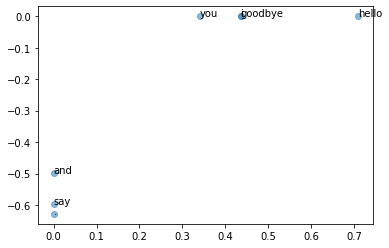

In [77]:
import matplotlib.pyplot as plt

for word, id in word_to_id.items():
  plt.annotate(word, (U[id,0], U[id,1]))

plt.scatter(U[:,0],U[:,1],alpha = 0.5)
plt.show()